In [45]:
import requests

api_url ="http://127.0.0.1:5000/reco_poster"
data={'numero':600}
response=requests.post(api_url,json=data)
print("Status Code:", response.status_code)
print("Response:", response.text)

Status Code: 200
Response: {
  "paths": [
    "movielens-20m-posters-for-machine-learning/MLP-20M\\MLP-20M\\102265.jpg",
    "movielens-20m-posters-for-machine-learning/MLP-20M\\MLP-20M\\130510.jpg",
    "movielens-20m-posters-for-machine-learning/MLP-20M\\MLP-20M\\112515.jpg",
    "movielens-20m-posters-for-machine-learning/MLP-20M\\MLP-20M\\109390.jpg",
    "movielens-20m-posters-for-machine-learning/MLP-20M\\MLP-20M\\1987.jpg"
  ]
}



In [6]:
import pandas as pd
features_df=pd.read_csv('features_df.csv',index_col=0)

In [46]:
features_df.shape

(26938, 2)

In [21]:
from annoy import AnnoyIndex
model_path="./annoy_index.ann"
dim = 576
annoy_index = AnnoyIndex(dim, 'angular')
annoy_index.load(model_path)
features_df=pd.read_csv('features_df.csv',index_col=0,,converters={"features": literal_eval})


In [38]:
import ast
import numpy as np

features_df=pd.read_csv('features_df.csv',index_col=0)

new_features_df = features_df.copy()

for i in range(len(new_features_df)):
    # Add commas between the elements of the array representation
    corrected_string = features_df["features"].iloc[i].replace('  ', ', ')
    new_features_df["features"].iloc[i] = ast.literal_eval(corrected_string)


SyntaxError: invalid syntax (<unknown>, line 6)

In [39]:
features_df["features"] = features_df["features"].apply(lambda x: list(map(float, x.strip('[]').split())))


In [22]:

def search(query_vector, k=5):
    indices = annoy_index.get_nns_by_vector(query_vector, k)
    paths = [paths_list[idx] for idx in indices]
    return paths
index = 600
query_vector = features_df.features[index]  
result = search(query_vector)

IndexError: Vector has wrong length (expected 576, got 9360)

ValueError: Could not save to JPEG for display

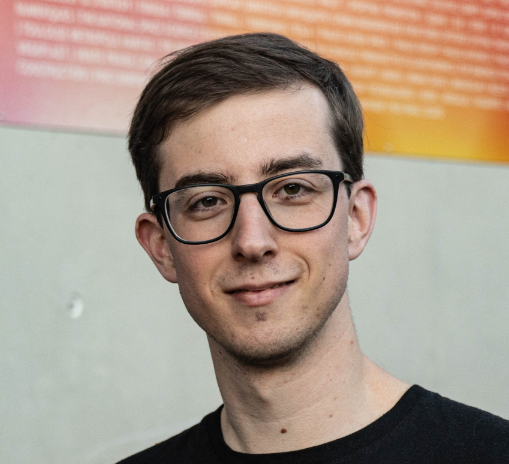

In [33]:
from PIL import Image

new_path='philippe.png'
p=Image.open(new_path)
with torch.no_grad():
    embeddings = annoy_index(x.cuda())
    features_list.extend(embeddings.cpu().numpy())
    paths_list.extend(paths)



In [30]:
df = pd.read_csv('indices.csv', index_col='title')

# Extract the Series from the DataFrame
indices = df.squeeze()
indices["Venice"]

0